# 3. Advanced Functions

Before we cast ourself into the more abstract Object-Oriented Programming (OOP), we'll wrap up on the Functional Programming regime by covering a series of the more advanced features of Python functions.

## Functions as objects

Are Python functions actually just objects like any other variable? The answer is yes, which means that they can actually be passed around like any other object/variable. See below a simple example where a function is passed as input to another function.

In [1]:
# My greeting function
def my_greeting(name):
    return f'Hello {name}!'

In [2]:
# A function that evaluate and prints a greeting function
def printer(greet_func, name):
    print( greet_func(name) )

In [3]:
# Evaluate the printer function
printer(my_greeting, 'Pythonistas')

Hello Pythonistas!


The reason this is possible is because, while Python may support functional programming, it's actually all about object-oriented programming which we'll talk about next time. Today we'll stick to the functional paradigm.

## Anonymous Functions
Anonymous functions are also known as lambda functions because they rely on the `lambda` keyword.
They allow for a more compact definition of a function but do not need to be assigned a name, thus anonymous. This is useful for small simple functions only needed locally in the code and therefore should not pollute the global namespace.

The minimalistic syntax is `lambda arguments: expression` but is better illustrated with an example.

In [4]:
# Classical named function
def my_func1(x, y):
    return 2*x + y

In [5]:
# Equivalent function using lambda
my_func2 = lambda x,y: 2*x + y

In [6]:
print(f'Result of my_func1(2, 1) = {my_func1(2, 1)}')

Result of my_func1(2, 1) = 5


In [7]:
print(f'Result of my_func2(2, 1) = {my_func2(2, 1)}')

Result of my_func2(2, 1) = 5


The main difference is that the lambda function does not have to be saved to a variable name. Examples of this are shown below.

## Filter, Map and Reduce
Some built-in functions that expect a function as input (also known as higher-order functions) are the filter, map and reduce functions illustrated below. These are all key functions in the paradigm of functional programming.

In [8]:
# The Filter function takes two arguments. A function defining the filter criteria  
# and a list/iterable to be filtered
list(filter( lambda x: x%2 == 0, [1,2,3,4,5,6,7,8,9,10] ))  # extracts even numbers

[2, 4, 6, 8, 10]

In [9]:
# The Map function applies a function element-wise to a list/iterable
list(map( lambda p: p * 1.10, [10,20,30,40]))

[11.0, 22.0, 33.0, 44.0]

In [10]:
# The Reduce function performs a repetitive operation on the first two elements of a list 
# merging them into one element until the whole list have been reduced
from functools import reduce
reduce( lambda c1, c2: f'({c1}+{c2})', ['a','b','c','d','e'])

'((((a+b)+c)+d)+e)'

## Decorators
A decorator is denoted with an `@` "pie notation" and is used if one needs to equip a function with an additional feature without editing the original function that might already be in use elsewhere or imported from another project.

In [11]:
# exotic function we cannot/will not change
def exo_func(x):
    print( f'x = {x} but with an exotic twist' )

In [12]:
# evaluating the function looks like this
exo_func(10)

x = 10 but with an exotic twist


A decorator is a function that defines a wrapping function that wraps the target function together with new features and returns the wrapping function without executing it.

In [13]:
# my decorator that adds additional features to the original exotic function
def my_decorator(func):
    def wrapper(x):  # <-- this is an inner function
        print('Do something before')
        func(x - 1)
        func(x + 1)
        print('Or do something after')
    return wrapper
# Note: that this function actually returns another unexecuted function!

In [14]:
# overwrites/redirect the `exo_func` variable name to a decorated version of the function
exo_func = my_decorator(exo_func)

In [15]:
# evaluating the decorated function
exo_func(10)

Do something before
x = 9 but with an exotic twist
x = 11 but with an exotic twist
Or do something after


It is therefore possible to modify the behaviour of an existing function without changing the original function.

Alternatively, if you already have a decorator that you want to use on a new function you may use the `@` "pie notation" as a syntactic shortcut.

In [16]:
from math import sqrt
@my_decorator
def my_sqrt(x):
    print( f'sqrt(x) = {sqrt(x)} but with a mathematical twist' )

In [17]:
# evaluating decorated math function
my_sqrt(10)

Do something before
sqrt(x) = 3.0 but with a mathematical twist
sqrt(x) = 3.3166247903554 but with a mathematical twist
Or do something after


## Generators
A generator is a special iterable function that does not terminate but wait for you to request the next output.
For this it uses the `yield` keyword that keeps the namespace inside the function alive until a `return` keyword is reached or there's no more code to run.
To ask a generator for its next output you use the `next()` function.

Let's have a look at a simple example.

In [18]:
# My simple generator
def count_to_10(start=0):
    num = start
    while True:
        num += 1
        if num > 10: return 'I can only count to 10! :('
        yield num

In [19]:
# Evaluating a generator just gives a generator object.
count_to_10(5)

<generator object count_to_10 at 0x7155365e94d0>

Instead one should ask the generator object for its next output like this:

In [20]:
my_num = count_to_10(5)
print( next(my_num) )
print( next(my_num) )
print( next(my_num) )
print( next(my_num) )

6
7
8
9


In [21]:
# it's still alive
next(my_num)

10

In [22]:
# if we try again we will exhaust the generator and it will throw a StopIteration exception
next(my_num)

StopIteration: I can only count to 10! :(

Asking for one output at a time can be useful if it's computational heavy and you properly won't need them all or if all of the outputs doesn't fit in memory.

Generators are especially nice when dealing with very large iterables, e.g. a list. By supplying only a single element at a time when it's needed. The entire list, say with a million elements, is not held in memory. 
So even if the list *can* fit in memory, it can still be good design to use generators. If you open Windows task manager at the same time you are running a script that loads a very large list into memory you will be able to see the vast memory consumption.

In [24]:
# calling list() on the generator forces it to compute the full sequence
list( count_to_10(start=2) )

[3, 4, 5, 6, 7, 8, 9, 10]

Generators can very easily be looped over:

In [25]:
for num in count_to_10():
    print(num)

1
2
3
4
5
6
7
8
9
10


Generators are extremely common in Python 3 where many of the built-in functions by default return a generator object/iterator instead of e.g. a list. Examples are Zip, Map and Filter.

It should be noted that calling `next()` on a generator object is mostly used for explaining how they work. I.e. to show that they are *waiting* for the *next* value to be requested. 
It is not necessary to use `next()` in your actual code, since it is automatically called internally when looping over a generator.

Similarly, you will not see the `StopIteration` error that is thrown internally when the generator is exhausted. When this error is encountered, Python will silently exit the loop.
These facts can be seen by the for-loop just above, where the none of these are visible.

### Generators - Practical example
The example below aims to demonstrate how a generator can be used in practice.

The generator yields points on a circle perimeter when given a radius and an increment to increase the angle with in each iteration.

In [26]:
from math import pi, floor, cos, sin


def points_on_circle(radius, angle_increment, center=(0, 0)):
    '''Yield points on a the perimeter of a circle.

    Parameters
    ----------
    radius: number
        Radius of the circle.
    angle_increment: number
        Increment with which to increase the angle in each iteration.
    center: tuple
        Coordinates for the center of the circle in the format (x, y).
        Defaults to (0, 0). 

    Yields
    ------
    tuple
        Coordinates for each point on the perimeter in the format (x, y).
    '''
    
    # Find the number of points to be computed
    n_points = floor(360 / angle_increment)

    # Loop over all angles within the circle and yield matching perimeter points
    for i in range(n_points):
        
        # Compute current angle
        angle = i * angle_increment

        # Compute x- and y-coordinate on perimeter for current angle
        x = center[0] + radius * cos(angle * pi / 180)
        y = center[1] + radius * sin(angle * pi / 180)

        yield x, y

Let's to a quick test to see if it behaves as we expect.

In [27]:
# Test the generator
for x, y in points_on_circle(radius=10, angle_increment=45):
    print(f'({x:.1f}, {y:.1f})')

(10.0, 0.0)
(7.1, 7.1)
(0.0, 10.0)
(-7.1, 7.1)
(-10.0, 0.0)
(-7.1, -7.1)
(-0.0, -10.0)
(7.1, -7.1)


The output looks correct.

For such a small number of points, it might not make much difference to use a generator compared to a regular function. But if the circle had a radius of multiple kilometers, it might be necessary to use a very small angle increment, and thereby many points, to get a fine curve when zooming in at a specific point. In that case, a generator would be a good choice. 

In addition, there's not more code to write compared to a function. In fact, the number of lines can often be reduced when using generators.

Let's try creating a plot to visualize the points that our generator yields.

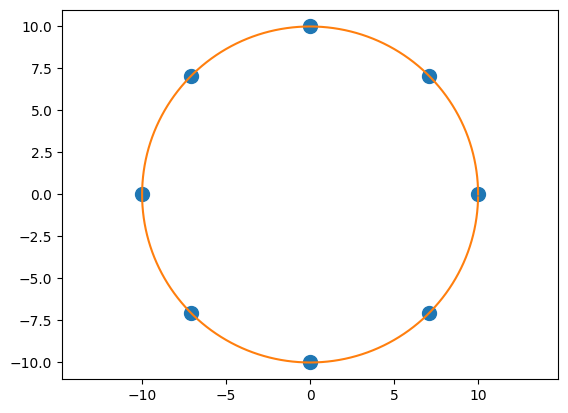

In [28]:
# Create generator with a circle of r=10 and angle increment of 45 degrees  
circle_point_gen = points_on_circle(radius=10, angle_increment=45)

# Exhaust the generator into a list
xy = list(circle_point_gen)

# The list `xy` now has the format [(x1, y1), (x2, y2), ..., (xn, yn)]

# Put x- and y-coordinates into separate lists
x, y = zip(*xy)

# Create the same circle, but with many points for plotting the entire circle
xy_full_circle = list(points_on_circle(radius=10, angle_increment=1))
x_full_circle, y_full_circle = zip(*xy_full_circle)

# Plot the results (with axis kept equal to the circle doesn't stretch)
import matplotlib.pyplot as plt
plt.plot(x, y, '.', markersize=20)
plt.plot(x_full_circle, y_full_circle)
plt.axis('equal')
plt.show()

Note that we exhausted our generator into a list since `plt.plot` expects a list as input. 

We thereby put the whole list in memory and "lost" the advantage of *yielding* one value at a time. This is totally fine in many cases, like often seen with e.g. the built-in `map`. Using generators just gives us both the option of yielding values and converting them to lists, tuples etc. 

## Coroutines
Coroutines are similar to generators, but instead of waiting to give the next output they wait for information to be sent to it via the send() method call. To do this the `yield` keyword now get a dual purpose, beside returning the output it also receives an input.

In [29]:
# Same example but now the yield keyword also insert an input into the num variable
def count_to_10(start=0, step=1):
    num = start
    while True:
        num += step
        if num > 10: return 'I can only count to 10! :('
        step = yield num

Strictly speaking coroutine only receives, so this is actually both a generator and a coroutine.

In [30]:
num = count_to_10(2)
next(num)  # moves the internal cursor down to the yield statement

3

In [31]:
num.send(1)  # the internal cursor must be located at the yield statement before input can be send

4

In [32]:
num.send(2)  # steps by two

6

In [33]:
num.send(3)  # steps by three

9

So beside keeping a function alive waiting for you to request its next output, information can now also be passed into the function during each of the iterations.

Finally, can both generators and coroutines be closed/terminated if they're no longer needed.

In [34]:
num.close()

# Exercises

The exercises in this session focus on:
 
- lambda functions
- decorators
- generators

*Remember to keep using git for version control of your code. Preferably this should become a new good habit of yours*.

## Exercise 1
You got a list of tuples where each tuple contains (x, y, z) coordinates. 
Your task is now to sort this list of data points according to descending y-coordinates in **one line of code** by the use of a lambda function.

Use the following code to generate the list of data points:
```python
# from the built-in random module import the random function that generates floats between 0 to 1.
from random import random
# generate a list of 10 data points
data_points = [(random(), random(), random()) for x in range(10)]
# print the data points
for data_point in data_points:
    print( data_point )
```

#### Hint 1
There's basicly two ways to sort a list. Either you can use the `list.sort()` method call to sort the list inplace or the `sorted(list)` function call on the list to output a new sorted list without changing the original. The choice is yours but in any case you should consider using the keyword arguments `key` and `reverse`. 
#### Hint 2
The keyword argument `key` takes in a function object that for each of the list elements return the key element of the sort.
#### Hint 3
In three lines of code it could be done like this:
```python
def get_second_value(x):
    return x[1]
sorted_points = sorted(data_points, key=get_second_value, reverse=True)
```


## Exercise 2
Write a decorator that measures and prints the execution time of a function compatible with any number of arguments and keyword arguments.

You can test your decorator in this function:
```python
import time
def wait_1_sec():
    time.sleep(1)  # sleeps 1 second
    print('slept for 1 second')
```
#### Hint 1
Without using a decorator it could look like this:
```python
start_time = time.perf_counter()
wait_1_sec()
end_time = time.perf_counter()
time_diff = end_time - start_time
print( f'the execution took {time_diff} seconds' )
```
#### Hint 2
Use ```(*args, **kwargs)``` as inputs to the wrapping function and pass them into the timed function.

## Exercise 3
Write a generator that outputs the element-wise squared value of a list. 

1. Define an arbitrary list
2. Use the generator to loop through the outputs while printing
3. Get the output from the generator as a new list

#### Hint 1
Use the `yield` keyword instead of `return` to turn a function into a generator.

#### Hint 2
Using the `list` function call on a generator will force the generator to complete all its iterations.

## Bonus exercise
Write a coroutine that prepares a new file for writing and then everytime it receives a string via the `send()` method it writes it to the file.
#### Hint 1
Remeber to use a context manager to ensure proper closing of the file once the coroutine is closed.
```python
with open(filename, 'w') as f:
    f.write(string)
```

# End of exercises
*The cell below is for setting the style of this document. It's not part of the exercises.*

In [35]:
# Apply css theme to notebook
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))